In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#customizing plt size
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading data
data =pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# X as input and Y as output
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [3]:
# Finding mean of X & Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Total no. of values
n = len(X)

# Suppose y=(b1)x + b0
# Finding b1 and b0
num = 0
den = 0
for i in range(n):
    num += (X[i]-mean_X)*(Y[i]-mean_Y)
    den += (X[i]-mean_X)**2
b1 = num/den
b0 = mean_Y-(b1*mean_X)

#Coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


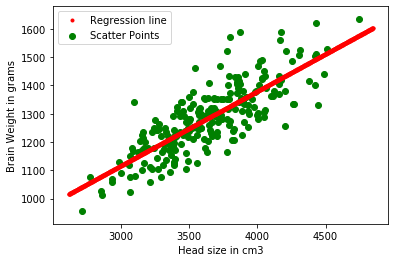

In [6]:
min_x = np.min(X)-100
max_x = np.max(X)+100

# Calculating line values of x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#Plotting Regression line
plt.plot(x,y,'.r', label = 'Regression line')
#Plotting Points
plt.scatter(X, Y, c='g', label = 'Scatter Points' )

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [9]:
# Evaluating Model using R2

ss_r = 0 # sum of square of residuals
ss_t = 0 # sum of totals

for i in range(n):
    y_pred = b0 + b1*X[i]
    ss_r += (Y[i]-y_pred)**2
    ss_t += (Y[i]-mean_Y)**2
    
r2 = 1 - (ss_r/ss_t)
print(r2)


0.6393117199570003


In [10]:
X.shape

(237,)

In [11]:
# Linear Regression using Sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# The rank 1 matrix cannot be used in scikit learn
X = X.reshape((n,1))

# Creating a model
reg = LinearRegression()

# Fitting
reg = reg.fit(X, Y)

# Y prediction
Y_pred = reg.predict(X)

# Calculating R2 score
r2_sk = reg.score(X,Y)
print(r2_sk)



0.639311719957
